# Part 2: Exploratory Data Analysis (EDA)

**Goal:** Now that our data is clean and structured, the goal of this section is to explore and visualize the dataset. EDA helps us to:
1.  Understand the distribution of our target variable and input features.
2.  Identify patterns, trends, and correlations between variables.
3.  Generate initial hypotheses about what drives CO₂ absorption rates.

These insights are crucial for building an effective machine learning model.

In [3]:
# Step 1: Initial Setup

# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Mount your Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your project folder in Google Drive
# IMPORTANT: Make sure this path is correct for your Drive setup
PROJECT_PATH = '/content/drive/MyDrive/CO2-Capture-ML/'

Mounted at /content/drive


In [4]:
# --- Setup and Load Clean Data ---

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# The PROJECT_PATH should already be defined from the cleaning steps.
# Load the CLEANED dataset we saved in the previous part.
cleaned_file_path = '/content/drive/MyDrive/CO2-Capture-ML/Data/Processed/Cleaned_Data.csv'
df = pd.read_csv(cleaned_file_path)

# Confirm the data is loaded correctly
print("--- Cleaned DataFrame Info ---")
df.info()

print("\n--- Cleaned DataFrame Preview ---")
display(df.head())

--- Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature_k                 293 non-null    float64
 1   CO2​ Loading (mol/mol_alk)    293 non-null    float64
 2   PCO2∗​ (Pa)                   293 non-null    float64
 3   Target -> kg′​ (mol/s·Pa·m²)  290 non-null    float64
 4   conc_aep_m                    293 non-null    float64
 5   conc_amp_m                    293 non-null    float64
 6   conc_dga_m                    293 non-null    float64
 7   conc_dmpz_m                   293 non-null    float64
 8   conc_eda_m                    293 non-null    float64
 9   conc_hep_m                    293 non-null    float64
 10  conc_mapa_m                   293 non-null    float64
 11  conc_mdea_m                   293 non-null    float64
 12  conc_mea_m                    293

,temperature_k,CO2​ Loading (mol/mol_alk),PCO2∗​ (Pa),Target -> kg′​ (mol/s·Pa·m²),conc_aep_m,conc_amp_m,conc_dga_m,conc_dmpz_m,conc_eda_m,conc_hep_m,conc_mapa_m,conc_mdea_m,conc_mea_m,conc_mpz_m,conc_pe_m,conc_pz_m
0,313.15,0.252,15.7,3.340000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
1,313.15,0.351,77.0,1.400000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2,313.15,0.432,465.0,7.660000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
3,313.15,0.496,4216.0,3.470000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
4,333.15,0.252,109.0,2.920000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


## 1. Descriptive Statistics

Let's start by generating descriptive statistics for all numerical columns. The `.describe()` method provides a quick and powerful summary, including the count, mean, standard deviation, min/max values, and quartiles. This helps us understand the scale and range of our data at a glance.

In [5]:
# Use .T to transpose the output for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_k,293.0,337.450341,20.919085,3.131500e+02,3.131500e+02,333.150000,353.150000,373.150000
CO2​ Loading (mol/mol_alk),293.0,0.291843,0.119453,2.700000e-02,2.100000e-01,0.285000,0.365000,0.695000
PCO2∗​ (Pa),293.0,11302.492833,30596.068466,4.000000e+00,6.340000e+02,3800.000000,12260.000000,416210.000000
Target -> kg′​ (mol/s·Pa·m²),290.0,0.000003,0.000006,8.000000e-08,6.447500e-07,0.000001,0.000003,0.000082
conc_aep_m,293.0,0.245734,1.191159,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000
conc_amp_m,293.0,0.212969,0.990072,0.000000e+00,0.000000e+00,0.000000,0.000000,4.800000
conc_dga_m,293.0,0.511945,2.207714,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000
conc_dmpz_m,293.0,0.066553,0.317591,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000
conc_eda_m,293.0,0.655290,2.731215,0.000000e+00,0.000000e+00,0.000000,0.000000,12.000000
conc_hep_m,293.0,0.341638,1.588240,0.000000e+00,0.000000e+00,0.000000,0.000000,7.700000


In [12]:
import pandas as pd
import numpy as np

# Let's assume your DataFrame with the messy column names is named 'df'

# 1. Create an explicit dictionary to map old names to new, clean names
column_rename_map = {
    'CO2​ Loading (mol/mol_alk)': 'co2_loading_mol_mol_alk',
    'PCO2∗​ (Pa)': 'p_star_co2_pa',
    "Target -> kg′​ (mol/s·Pa·m²)": 'target_kg_prime'
}

# 2. Rename the columns using the map
df.rename(columns=column_rename_map, inplace=True)

# 3. Convert the newly named target column to a numeric type (float)
# This is a crucial step for modeling
df['target_kg_prime'] = pd.to_numeric(df['target_kg_prime'], errors='coerce')

# 4. Drop any rows that might have failed the conversion
df.dropna(subset=['target_kg_prime'], inplace=True)

# --- Verification ---
# Let's check the info again. All columns should now be numeric with clean names.
print("--- DataFrame Info After Correction ---")
df.info()

print("\n--- Corrected DataFrame Preview ---")
display(df.head())

--- DataFrame Info After Correction ---
<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature_k            290 non-null    float64
 1   co2_loading_mol_mol_alk  290 non-null    float64
 2   p_star_co2_pa            290 non-null    float64
 3   target_kg_prime          290 non-null    float64
 4   conc_aep_m               290 non-null    float64
 5   conc_amp_m               290 non-null    float64
 6   conc_dga_m               290 non-null    float64
 7   conc_dmpz_m              290 non-null    float64
 8   conc_eda_m               290 non-null    float64
 9   conc_hep_m               290 non-null    float64
 10  conc_mapa_m              290 non-null    float64
 11  conc_mdea_m              290 non-null    float64
 12  conc_mea_m               290 non-null    float64
 13  conc_mpz_m               290 non-null    floa

,temperature_k,co2_loading_mol_mol_alk,p_star_co2_pa,target_kg_prime,conc_aep_m,conc_amp_m,conc_dga_m,conc_dmpz_m,conc_eda_m,conc_hep_m,conc_mapa_m,conc_mdea_m,conc_mea_m,conc_mpz_m,conc_pe_m,conc_pz_m
0,313.15,0.252,15.7,3.340000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
1,313.15,0.351,77.0,1.400000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2,313.15,0.432,465.0,7.660000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
3,313.15,0.496,4216.0,3.470000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
4,333.15,0.252,109.0,2.920000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


## 2. Analyzing the Target Variable: Absorption Rate (target_kg_prime)

Understanding the distribution of our target variable is the most important part of EDA. From the statistics above, we can see that the `target_kg_prime` has a very large range (from E-08 to E-05). This suggests the distribution is heavily skewed.

We will visualize this with a histogram and then apply a logarithmic transformation to see if we can get a more normalized, bell-shaped curve. This is important because many models perform better when the target variable is normally distributed.

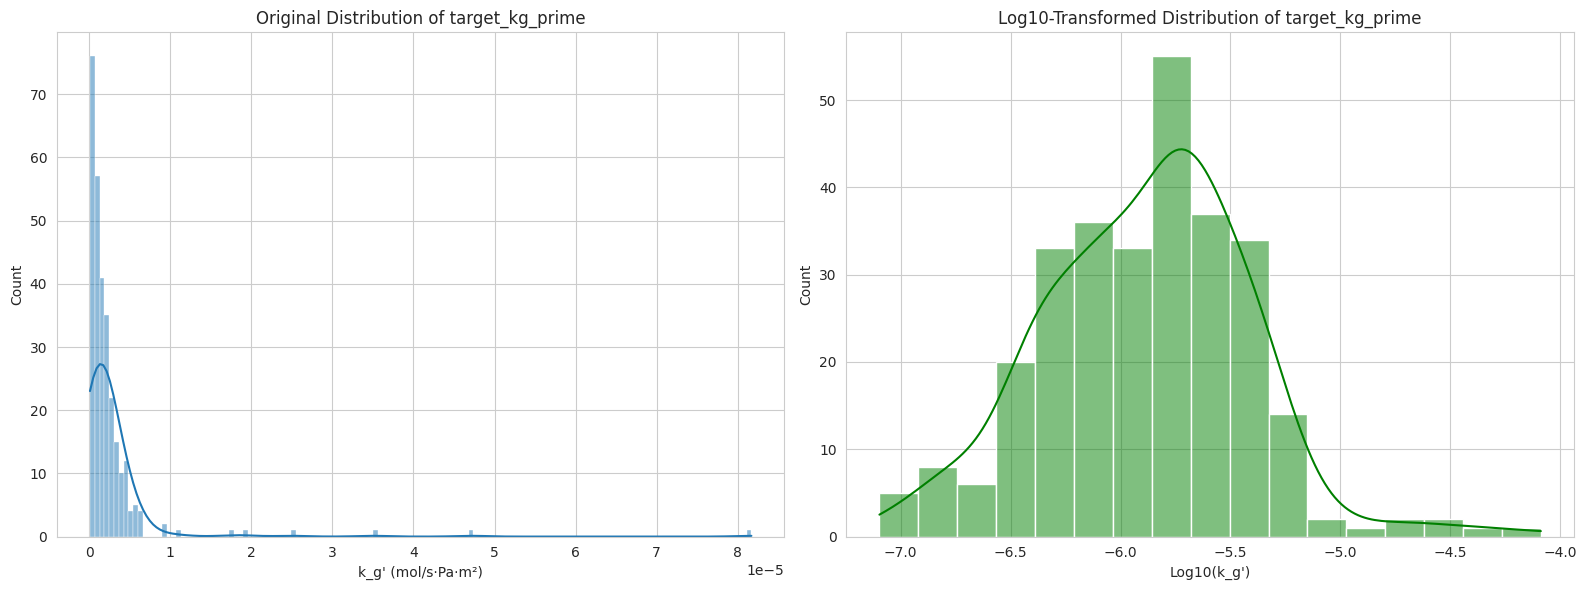

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Original Distribution (This remains the same) ---
sns.histplot(df['target_kg_prime'], kde=True, ax=axes[0])
axes[0].set_title('Original Distribution of target_kg_prime')
axes[0].set_xlabel("k_g' (mol/s·Pa·m²)")
axes[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Use scientific notation for x-axis

# --- Plot 2: Log-Transformed Distribution (CORRECTED) ---
# Use np.log10() to properly scale the data
df['log10_target_kg_prime'] = np.log10(df['target_kg_prime'])
sns.histplot(df['log10_target_kg_prime'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Log10-Transformed Distribution of target_kg_prime')
axes[1].set_xlabel("Log10(k_g')")

plt.tight_layout()
plt.show()

### Observations
As expected, the original distribution of `target_kg_prime` is extremely left-skewed, with most values clustered near zero. The log-transformed version, however, is much closer to a normal (Gaussian) distribution. This is a key finding! We should likely train our model to predict the log of the target variable and then convert the prediction back to the original scale.

## 3. Analyzing Key Input Features

Now, let's look at the distributions of our main numerical inputs: `temperature_k`, `co2_loading`, and `p_star_co2_pa`.

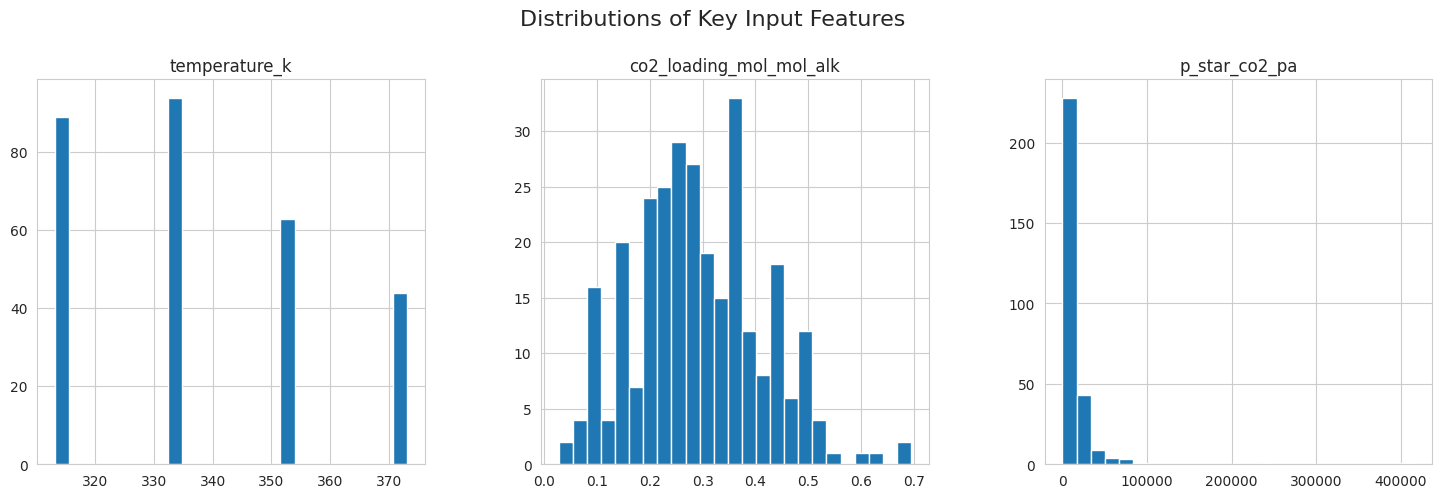

In [16]:
# --- 3. Analyzing Key Input Features ---

# Select the main numerical features (non-concentration) for plotting
features_to_plot = ['temperature_k', 'co2_loading_mol_mol_alk', 'p_star_co2_pa']

# Create histograms for these features to understand their distributions
df[features_to_plot].hist(bins=25, figsize=(18, 5), layout=(1, 3))
plt.suptitle('Distributions of Key Input Features', y=1.02, size=16)
plt.show()

### Observations
- **Temperature:** The experiments were conducted at specific temperature levels (313K, 333K, 353K, 373K), which is clear from the distinct bars.
- **CO2 Loading:** The loading values are spread out across the operational range, with a concentration of data points below 0.4 mol/mol_alk.
- **P* CO2:** The equilibrium partial pressure is heavily right-skewed, with most values being very low. This confirms that using a log scale is appropriate when visualizing this feature's relationships.

## 4. Exploring Relationships: Features vs. Target

This is where we hunt for the patterns that will drive our model. We will create plots to visualize how our key input features relate to the absorption rate ($k_g'$). We will plot them against the **log10-transformed target** to make the underlying trends clearer.

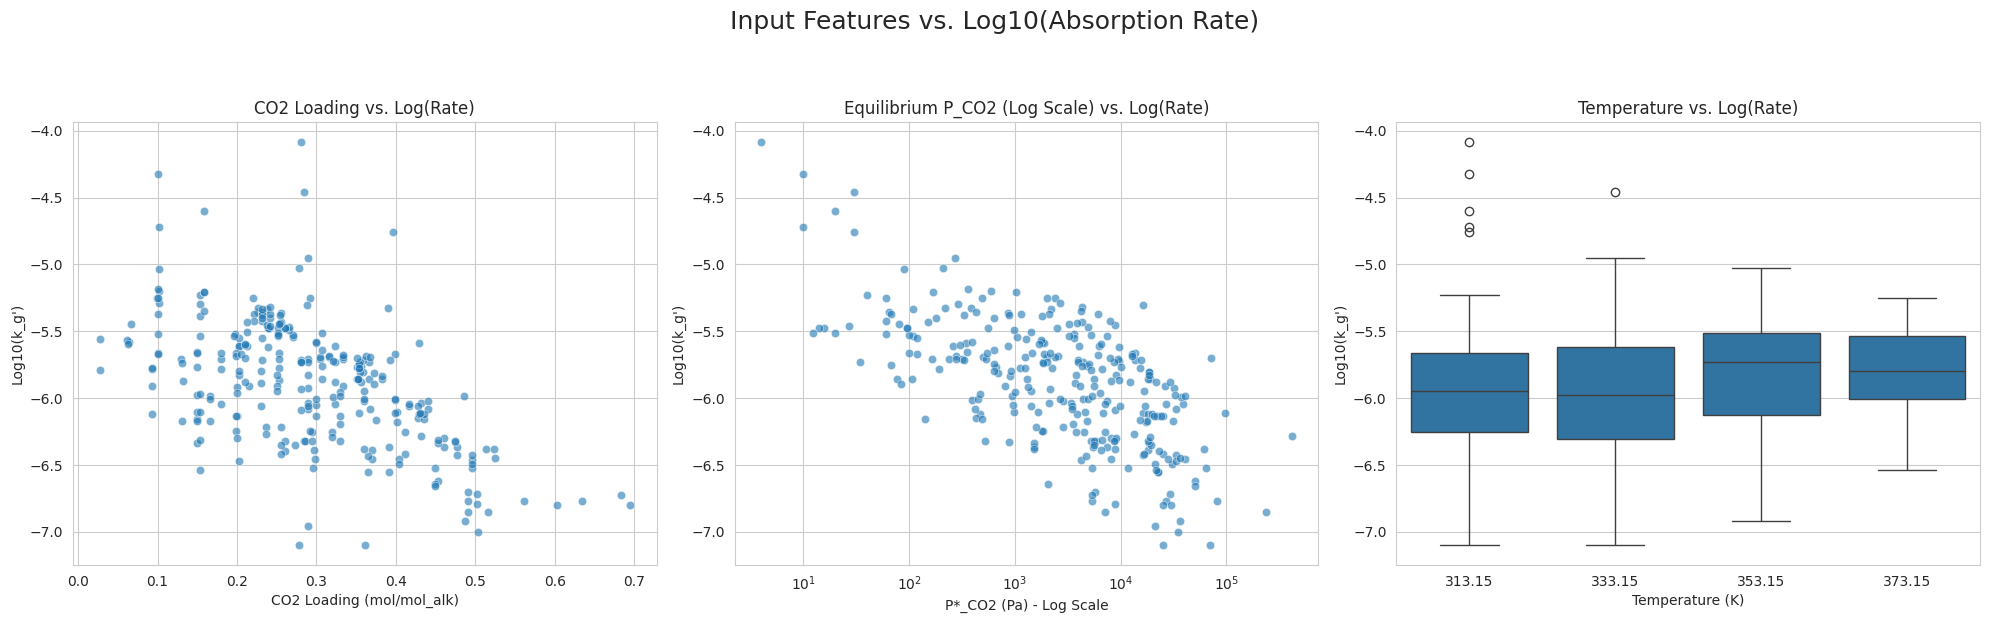

In [17]:
# Create a figure with three subplots for visualizing relationships
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Input Features vs. Log10(Absorption Rate)', size=18, y=1.03)

# 1. CO2 Loading vs. Log Target
sns.scatterplot(data=df, x='co2_loading_mol_mol_alk', y='log10_target_kg_prime', ax=axes[0], alpha=0.6)
axes[0].set_title("CO2 Loading vs. Log(Rate)")
axes[0].set_xlabel("CO2 Loading (mol/mol_alk)")
axes[0].set_ylabel("Log10(k_g')")


# 2. P* CO2 vs. Log Target (using a log scale for the x-axis)
sns.scatterplot(data=df, x='p_star_co2_pa', y='log10_target_kg_prime', ax=axes[1], alpha=0.6)
axes[1].set_xscale('log') # Use a log scale for the x-axis
axes[1].set_title("Equilibrium P_CO2 (Log Scale) vs. Log(Rate)")
axes[1].set_xlabel("P*_CO2 (Pa) - Log Scale")
axes[1].set_ylabel("Log10(k_g')")


# 3. Temperature vs. Log Target (a boxplot is better for discrete temperature levels)
sns.boxplot(data=df, x='temperature_k', y='log10_target_kg_prime', ax=axes[2])
axes[2].set_title("Temperature vs. Log(Rate)")
axes[2].set_xlabel("Temperature (K)")
axes[2].set_ylabel("Log10(k_g')")


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Observations
1.  **CO2 Loading:** There is a powerful, clear **negative correlation**. As the solvent becomes more saturated with CO₂, its ability to absorb more CO₂ quickly diminishes. This is expected from chemical principles and is clearly the most dominant trend in the data.
2.  **P* CO2:** Similarly, there is a strong **negative correlation**. Higher equilibrium partial pressure (which is a result of higher loading and/or temperature) corresponds to a lower absorption rate.
3.  **Temperature:** The relationship is more complex. The median absorption rate appears to decrease as temperature increases, but there is significant overlap between the distributions. This suggests temperature's effect likely interacts with other variables, such as the amine type and loading.

## 5. Correlation Analysis

A correlation heatmap is a powerful tool to visualize the linear relationships between all numerical variables at once. This helps confirm our findings and can also reveal multicollinearity (input features that are highly correlated with each other), which can be important for some model types.

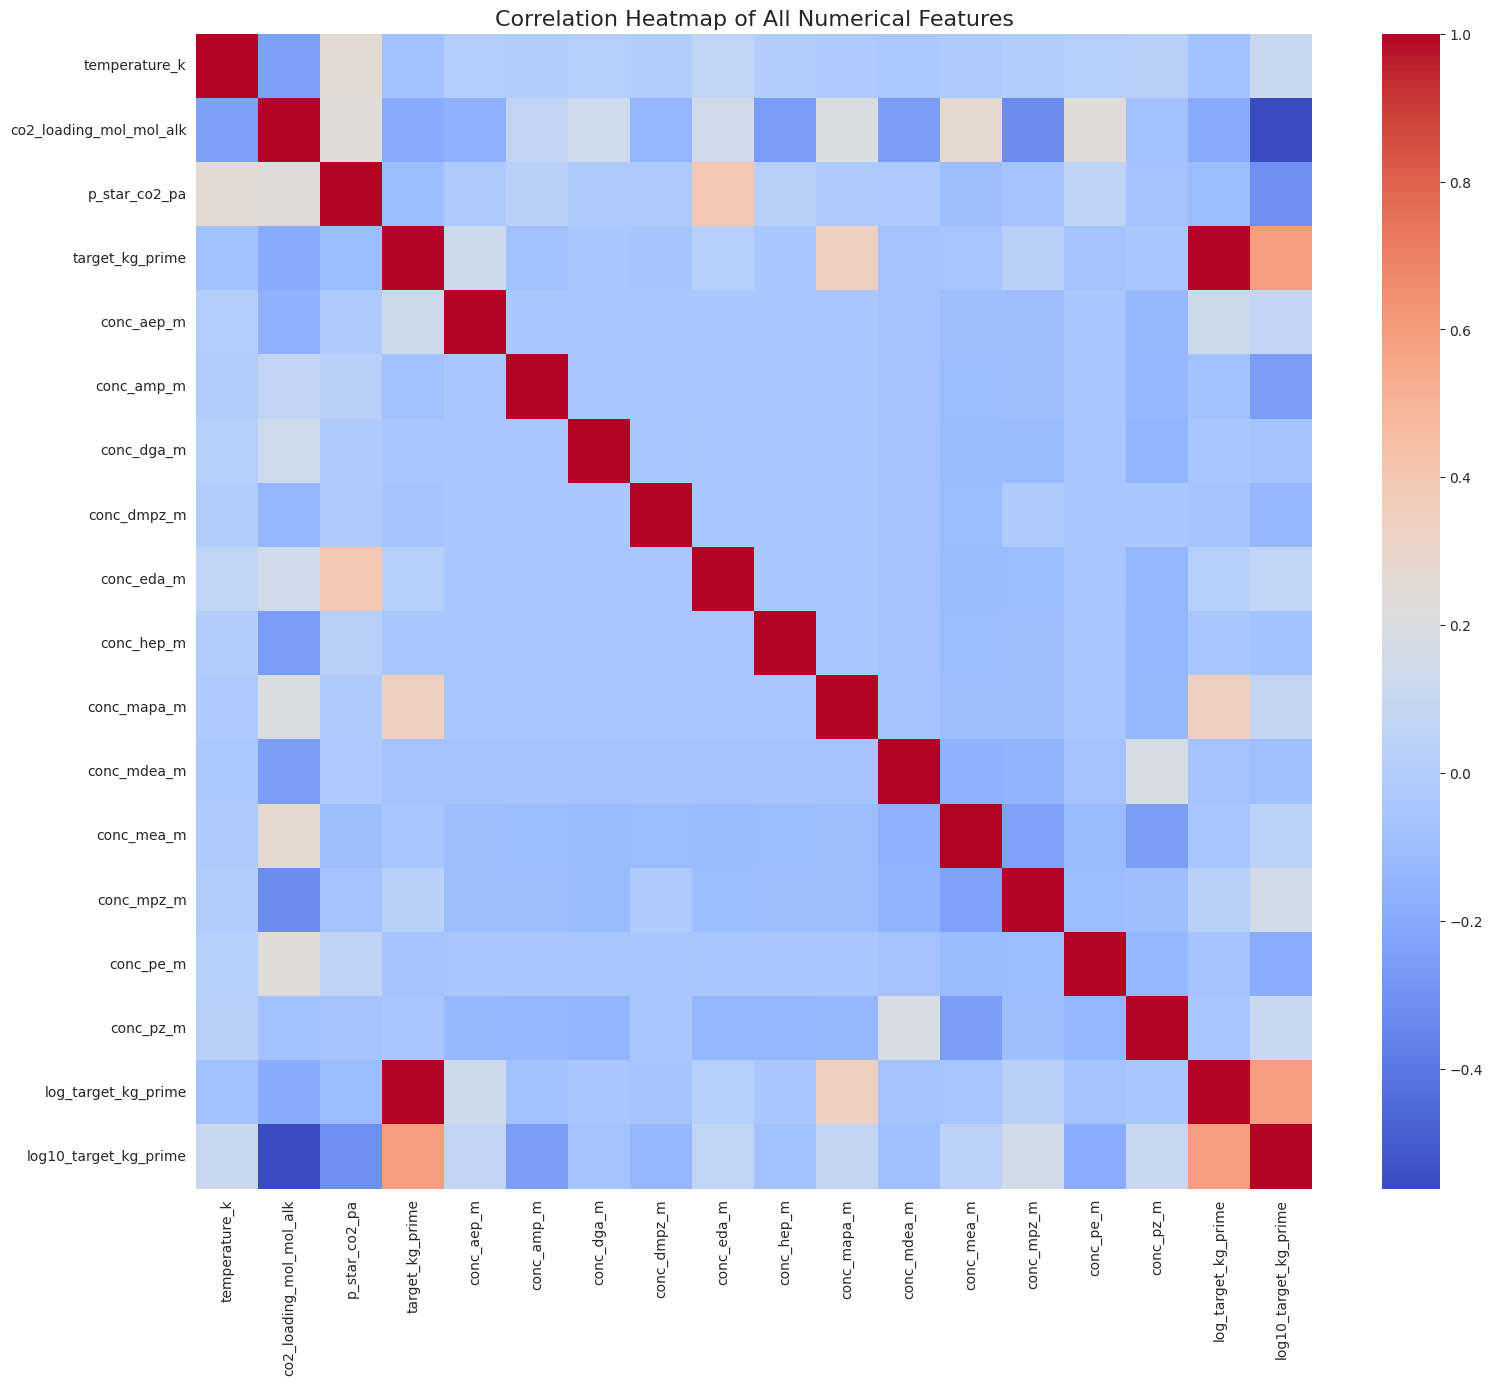


--- Feature Correlation with Log10 Target Variable ---
log10_target_kg_prime      1.000000
log_target_kg_prime        0.593482
target_kg_prime            0.593475
conc_mpz_m                 0.154654
temperature_k              0.111189
conc_pz_m                  0.105833
conc_mapa_m                0.079559
conc_aep_m                 0.077011
conc_eda_m                 0.062918
conc_mea_m                 0.039157
conc_dga_m                -0.063420
conc_hep_m                -0.079581
conc_mdea_m               -0.089441
conc_dmpz_m               -0.128927
conc_pe_m                 -0.179196
conc_amp_m                -0.253192
p_star_co2_pa             -0.313412
co2_loading_mol_mol_alk   -0.562035
Name: log10_target_kg_prime, dtype: float64


In [25]:
# Calculate the correlation matrix for all variables
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of All Numerical Features', size=16)
plt.show()

# To make this easier to read, let's just look at the correlations
# of all features with our target variable, sorted from strongest to weakest.
print("\n--- Feature Correlation with Log10 Target Variable ---")
print(correlation_matrix['log10_target_kg_prime'].sort_values(ascending=False))

### Understanding Our Correlation Results

The **Pearson Correlation Coefficient** for each feature in our dataset relative to our target variable, `log10_target_kg_prime`. This coefficient is a value between **-1 and +1** that measures the strength and direction of a *linear* relationship between two variables.

* **Value close to +1.0:** Strong positive correlation. As the feature's value increases, the absorption rate also tends to increase.
* **Value close to -1.0:** Strong negative correlation. As the feature's value increases, the absorption rate tends to decrease.
* **Value close to 0.0:** Weak or no linear correlation.

The list is sorted from the most positively correlated feature to the most negatively correlated.

---
### Definition of Each Term

#### **Target Variables**
* **`log10_target_kg_prime` (1.000000):** This is the **log-10 transformed absorption rate ($k_g'$)**. It is the primary target our model will be trained to predict. A value of 1.0 just means it's perfectly correlated with itself.
* **`log_target_kg_prime` & `target_kg_prime` (~0.593):** These are the natural log and the original, un-transformed absorption rate. Their high positive correlation is expected. These should be removed from our feature set before training to prevent data leakage.

#### **Input Features (Predictors)**

These are the variables the model will use to make its predictions.

##### **Process Conditions**
* **`temperature_k` (0.111189):** This is the **absolute temperature** in Kelvin. The weak positive correlation confirms what we saw in the EDA plots—that temperature's effect on the rate is complex and not strongly linear on its own.
* **`p_star_co2_pa` (-0.313412):** This is the **equilibrium partial pressure of $CO_2$**. The significant negative correlation is a key finding: as a solvent gets closer to its equilibrium point (higher pressure), the driving force for absorption diminishes, and the rate slows down considerably.
* **`co2_loading_mol_mol_alk` (-0.562035):** This is the **$CO_2$ Loading** of the solvent. This is our **strongest and most important predictor**. The strong negative value confirms that as the solvent becomes saturated with $CO_2$, its ability to absorb more rapidly decreases.

##### **Amine Concentration Features**
These features quantify the composition of the solvent. A positive correlation generally suggests a "faster" amine, while a negative correlation suggests a "slower" amine on average across the experimental conditions.

* **`conc_mpz_m` (0.154654):** Concentration of **N-Methylpiperazine (1MPZ)**. The positive value suggests it's a relatively fast solvent.
* **`conc_pz_m` (0.105833):** Concentration of **Piperazine (PZ)**. Also indicates a fast solvent.
* **`conc_mapa_m` (0.079559):** Concentration of **3-(methylamino)propylamine (MAPA)**.
* **`conc_aep_m` (0.077011):** Concentration of **1-(2-Aminoethyl)piperazine (AEP)**.
* **`conc_eda_m` (0.062918):** Concentration of **Ethylenediamine (EDA)**.
* **`conc_mea_m` (0.039157):** Concentration of **Monoethanolamine (MEA)**, the baseline solvent.
* **`conc_dga_m` (-0.063420):** Concentration of **Diglycolamine (DGA)**. The negative sign suggests it is, on average, a slower solvent than those above it.
* **`conc_hep_m` (-0.079581):** Concentration of **N-(2-hydroxyethyl)piperazine (HEP)**.
* **`conc_mdea_m` (-0.089441):** Concentration of **Methyldiethanolamine (MDEA)**.
* **`conc_dmpz_m` (-0.128927):** Concentration of **Dimethylpiperazine**.
* **`conc_pe_m` (-0.179196):** Concentration of **2-Piperidineethanol (2-PE)**.
* **`conc_amp_m` (-0.253192):** Concentration of **2-amino-2-methyl-1-propanol (AMP)**. This hindered amine shows a notable negative correlation, suggesting it is one of the slower solvents in this dataset.

---
### Key Takeaways for Your Model
This analysis is extremely valuable. It confirms that the features we've prepared have predictive power. Our model will learn to heavily penalize high `co2_loading` and `p_star_co2_pa`, and it will use the various `conc_..._m` features to differentiate the performance between the different chemical systems.

### EDA Summary & Next Steps

This exploratory analysis has provided several critical insights that will guide our modeling phase:

- **Target Variable Transformation:** The target variable, `target_kg_prime`, **must be log-transformed** (`log10_target_kg_prime`) before modeling to handle its severe skewness. We will train the model to predict this log value.
- **Key Predictors:** The most influential features are clearly `co2_loading_mol_mol_alk` and `p_star_co2_pa`, both having strong negative correlations with the absorption rate.
- **Feature Importance:** The concentration of specific amines (like `conc_2mpz_m` and `conc_aep_m`) also shows a strong correlation, proving that our feature engineering step was valuable. Our model will be able to learn which amines are inherently faster than others.
- **Data is Ready:** The dataset is now clean, understood, and prepared.
